In [46]:
import pandas as pd 
import matplotlib.pyplot as plt
import ast
from prettytable import PrettyTable
import seaborn as sns

In [47]:
la_text = pd.read_csv("los_angeles_random_labels.csv")
spokane_text = pd.read_csv("spokane_random_labels.csv")
seattle_text = pd.read_csv("seattle_random_labels.csv")
slc_text = pd.read_csv("salt_lake_city_random_labels.csv")
portland_text = pd.read_csv("portland_random_labels.csv")

la_labels = la_text['labels'].apply(ast.literal_eval)
spokane_labels = spokane_text['labels'].apply(ast.literal_eval)
seattle_labels = seattle_text['labels'].apply(ast.literal_eval)
slc_labels = slc_text['labels'].apply(ast.literal_eval)
portland_labels = portland_text['labels'].apply(ast.literal_eval)

In [56]:
# needed functions 

def build_label_distribution(label_set):
    dist_dict = {
        "grateful": 0, 
        "political": 0, 
        "frustration": 0, 
        "solution focused": 0, 
        "informative": 0, 
        "news": 0, 
        "fearful or panicked": 0,
        "blaming": 0, 
        "seeking help or advice": 0, 
        "prescribed burn": 0, 
        "wildfire": 0, 
        "fire management": 0
    }
    
    for row in label_set:
        for label in row:
            dist_dict[label] += 1

    return dist_dict

def sort_dict(unsorted_dict):
    sorted_dict = dict(sorted(unsorted_dict.items(), key=lambda x: x[1], reverse=True))
    return sorted_dict

def create_table(perc_dict, location):
    table = PrettyTable()
    table.field_names = ['label', 'probability']
    table.title = str(location) + " - Most Frequent Labels Detected using BERT Zero Shot Model"

    for row in perc_dict:
        table.add_rows([[row, perc_dict[row]]])

    print(table)

    return 


def convert_to_perc(sorted_dict):
    total = sum(sorted_dict.values())
    count = 0
    perc_dict = {}
    values = list(sorted_dict.values())

    for key in sorted_dict.keys():
        perc_dict[key] = float(f"{(values[count] / total): .3f}")
        count += 1

    return perc_dict

def plot_distribution(sorted_dict, location):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(sorted_dict.keys()), y=list(sorted_dict.values()))
    plt.xticks(rotation=70)
    plt.title(str(location) + " - Label Count Using Zero Shot BERT Model")
    plt.xlabel("label")
    plt.ylabel("count")
    plt.show()
    return 

In [57]:
# LA analysis

la_label_dist_dict = build_label_distribution(la_labels)

la_label_dist_dict_sorted = sort_dict(la_label_dist_dict)

la_label_dist_dict_sorted_perc = convert_to_perc(la_label_dist_dict_sorted)

create_table(la_label_dist_dict_sorted_perc, "LA")

+---------------------------------------------------------------+
| LA - Most Frequent Labels Detected using BERT Zero Shot Model |
+----------------------------------------+----------------------+
|                 label                  |     probability      |
+----------------------------------------+----------------------+
|              informative               |         0.3          |
|                blaming                 |        0.123         |
|              frustration               |        0.114         |
|          fearful or panicked           |        0.097         |
|               political                |        0.092         |
|                  news                  |        0.072         |
|         seeking help or advice         |        0.066         |
|                wildfire                |        0.047         |
|                grateful                |        0.042         |
|            fire management             |        0.039         |
|         

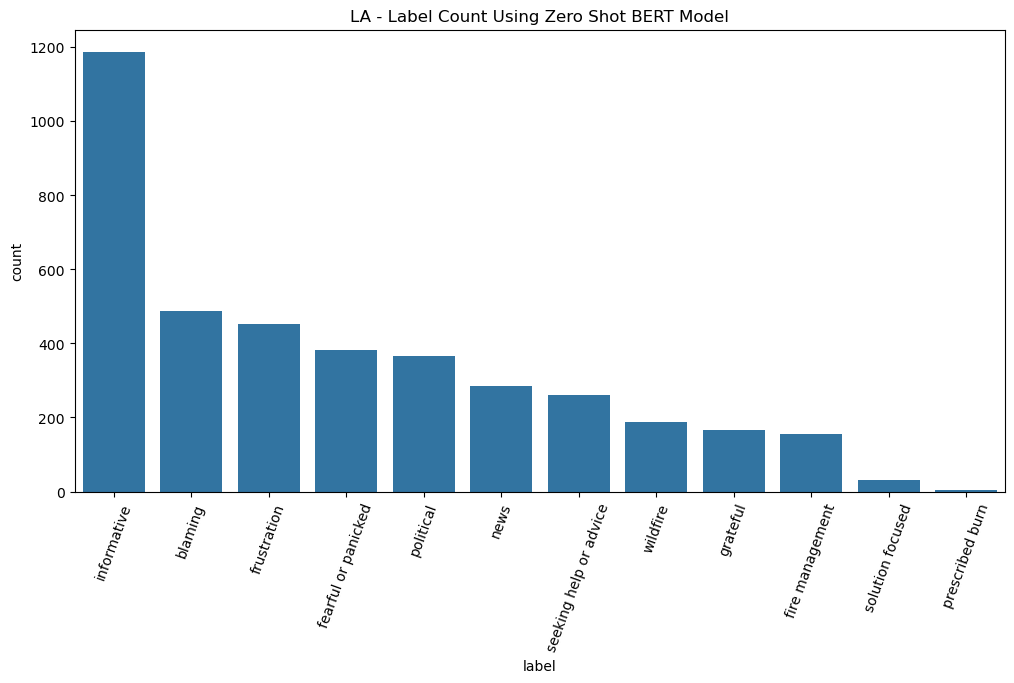

In [58]:
plot_distribution(la_label_dist_dict_sorted, "LA")

In [59]:
# Spokane Analysis

spokane_label_dist_dict = build_label_distribution(spokane_labels)

spokane_label_dist_dict_sorted = sort_dict(spokane_label_dist_dict)

spokane_label_dist_dict_sorted_perc = convert_to_perc(spokane_label_dist_dict_sorted)

create_table(spokane_label_dist_dict_sorted_perc, "Spokane")

+--------------------------------------------------------------------+
| Spokane - Most Frequent Labels Detected using BERT Zero Shot Model |
+--------------------------------------------+-----------------------+
|                   label                    |      probability      |
+--------------------------------------------+-----------------------+
|                informative                 |         0.306         |
|                  blaming                   |         0.098         |
|                    news                    |          0.09         |
|                frustration                 |         0.089         |
|                  wildfire                  |         0.083         |
|            fearful or panicked             |         0.082         |
|                 political                  |         0.074         |
|           seeking help or advice           |         0.067         |
|              fire management               |         0.066         |
|     

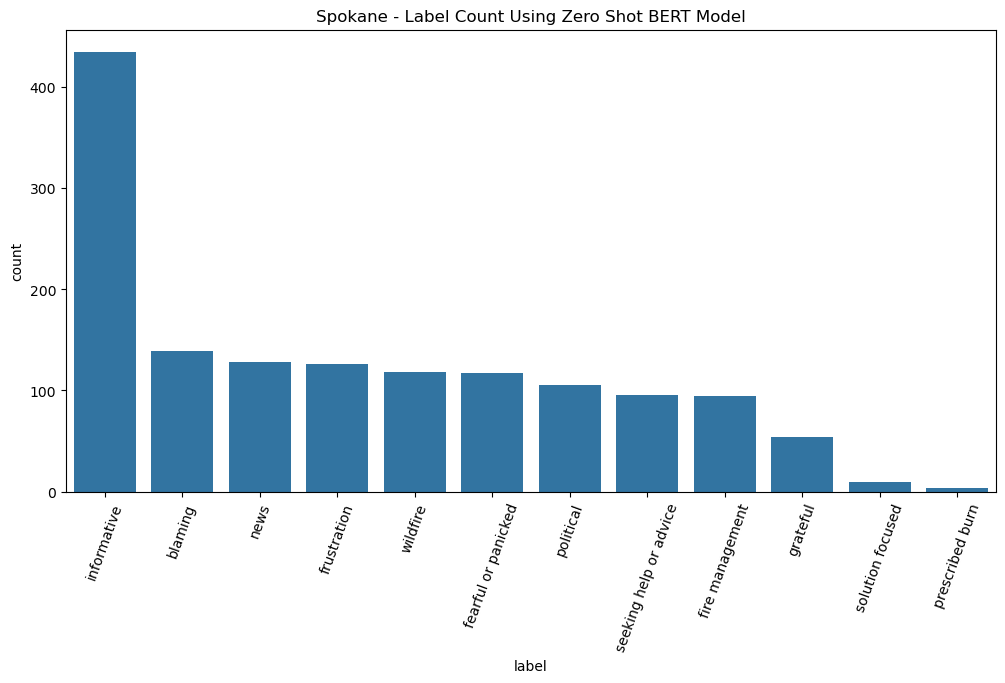

In [60]:
plot_distribution(spokane_label_dist_dict_sorted, "Spokane")

In [63]:
# Seattle Analysis

seattle_label_dist_dict = build_label_distribution(seattle_labels)

seattle_label_dist_dict_sorted = sort_dict(seattle_label_dist_dict)

seattle_label_dist_dict_sorted_perc = convert_to_perc(seattle_label_dist_dict_sorted)

create_table(seattle_label_dist_dict_sorted_perc, "Seattle")

+--------------------------------------------------------------------+
| Seattle - Most Frequent Labels Detected using BERT Zero Shot Model |
+--------------------------------------------+-----------------------+
|                   label                    |      probability      |
+--------------------------------------------+-----------------------+
|                informative                 |         0.308         |
|            fearful or panicked             |         0.114         |
|                    news                    |         0.094         |
|                  wildfire                  |         0.086         |
|                  blaming                   |         0.081         |
|                frustration                 |         0.079         |
|           seeking help or advice           |         0.069         |
|              fire management               |         0.062         |
|                  grateful                  |         0.061         |
|     

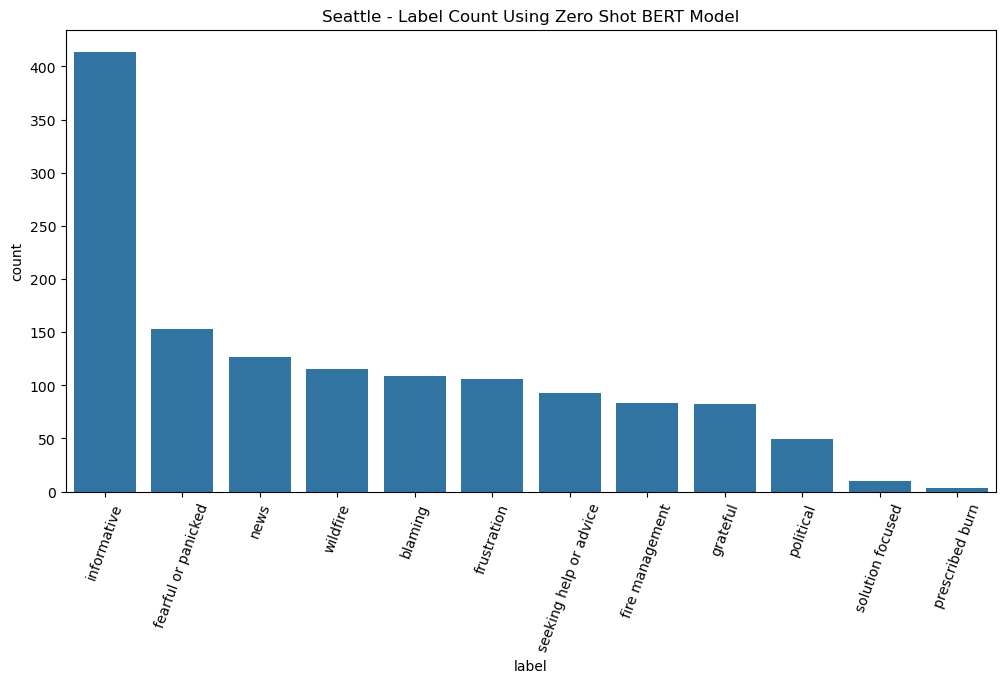

In [64]:
plot_distribution(seattle_label_dist_dict_sorted, "Seattle")

In [65]:
# Salt Lake City Analysis

slc_label_dist_dict = build_label_distribution(slc_labels)

slc_label_dist_dict_sorted = sort_dict(slc_label_dist_dict)

slc_label_dist_dict_sorted_perc = convert_to_perc(slc_label_dist_dict_sorted)

create_table(slc_label_dist_dict_sorted_perc, "Salt Lake City")

+---------------------------------------------------------------------------+
| Salt Lake City - Most Frequent Labels Detected using BERT Zero Shot Model |
+------------------------------------------------+--------------------------+
|                     label                      |       probability        |
+------------------------------------------------+--------------------------+
|                  informative                   |          0.302           |
|                      news                      |          0.106           |
|              fearful or panicked               |          0.106           |
|                    wildfire                    |          0.095           |
|                  frustration                   |          0.086           |
|                    blaming                     |           0.08           |
|                fire management                 |           0.08           |
|                    grateful                    |          0.05

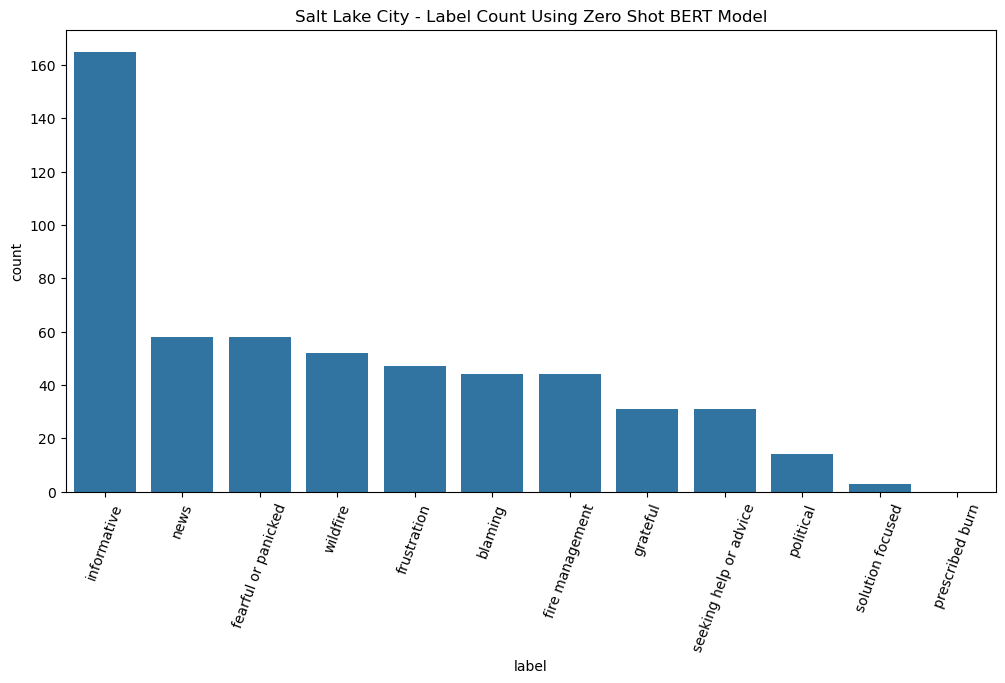

In [66]:
plot_distribution(slc_label_dist_dict_sorted, "Salt Lake City")

In [67]:
# Portland Analysis

portland_label_dist_dict = build_label_distribution(portland_labels)

portland_label_dist_dict_sorted = sort_dict(portland_label_dist_dict)

portland_label_dist_dict_sorted_perc = convert_to_perc(portland_label_dist_dict_sorted)

create_table(portland_label_dist_dict_sorted_perc, "Portland")

+---------------------------------------------------------------------+
| Portland - Most Frequent Labels Detected using BERT Zero Shot Model |
+--------------------------------------------+------------------------+
|                   label                    |      probability       |
+--------------------------------------------+------------------------+
|                informative                 |         0.293          |
|            fearful or panicked             |         0.115          |
|                  blaming                   |         0.109          |
|                frustration                 |         0.099          |
|                    news                    |          0.08          |
|           seeking help or advice           |         0.071          |
|                  wildfire                  |         0.061          |
|              fire management               |         0.058          |
|                 political                  |         0.054    

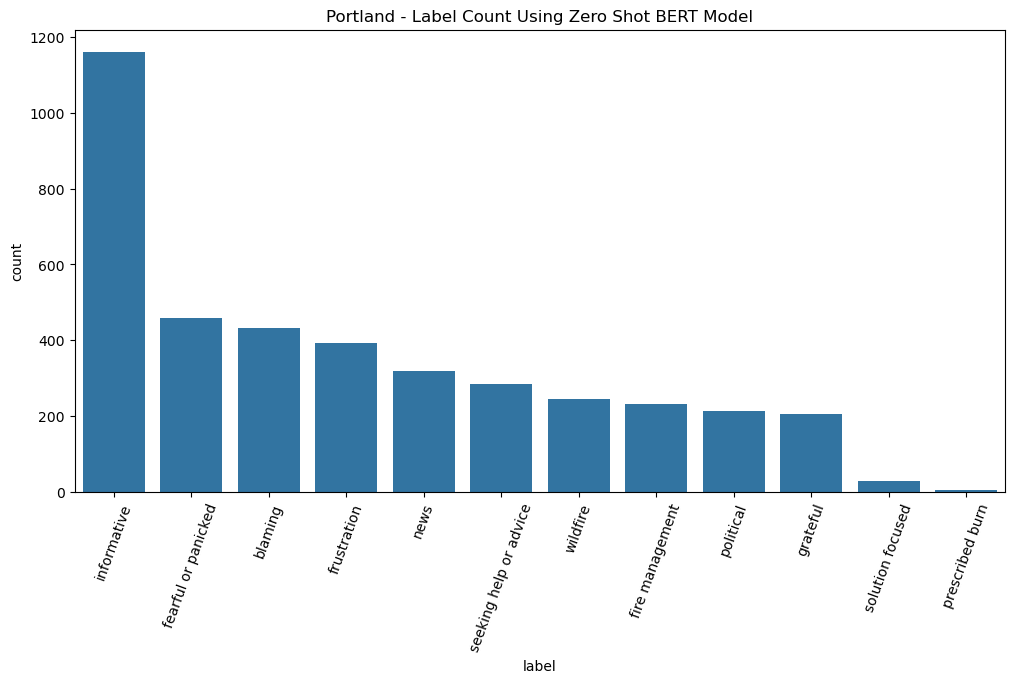

In [68]:
plot_distribution(portland_label_dist_dict_sorted, "Portland")